In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import itertools
import torch

# Business & Data Understanding

# Data Cleaning and Anlysis

In [85]:
df = pd.read_csv('./datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ham

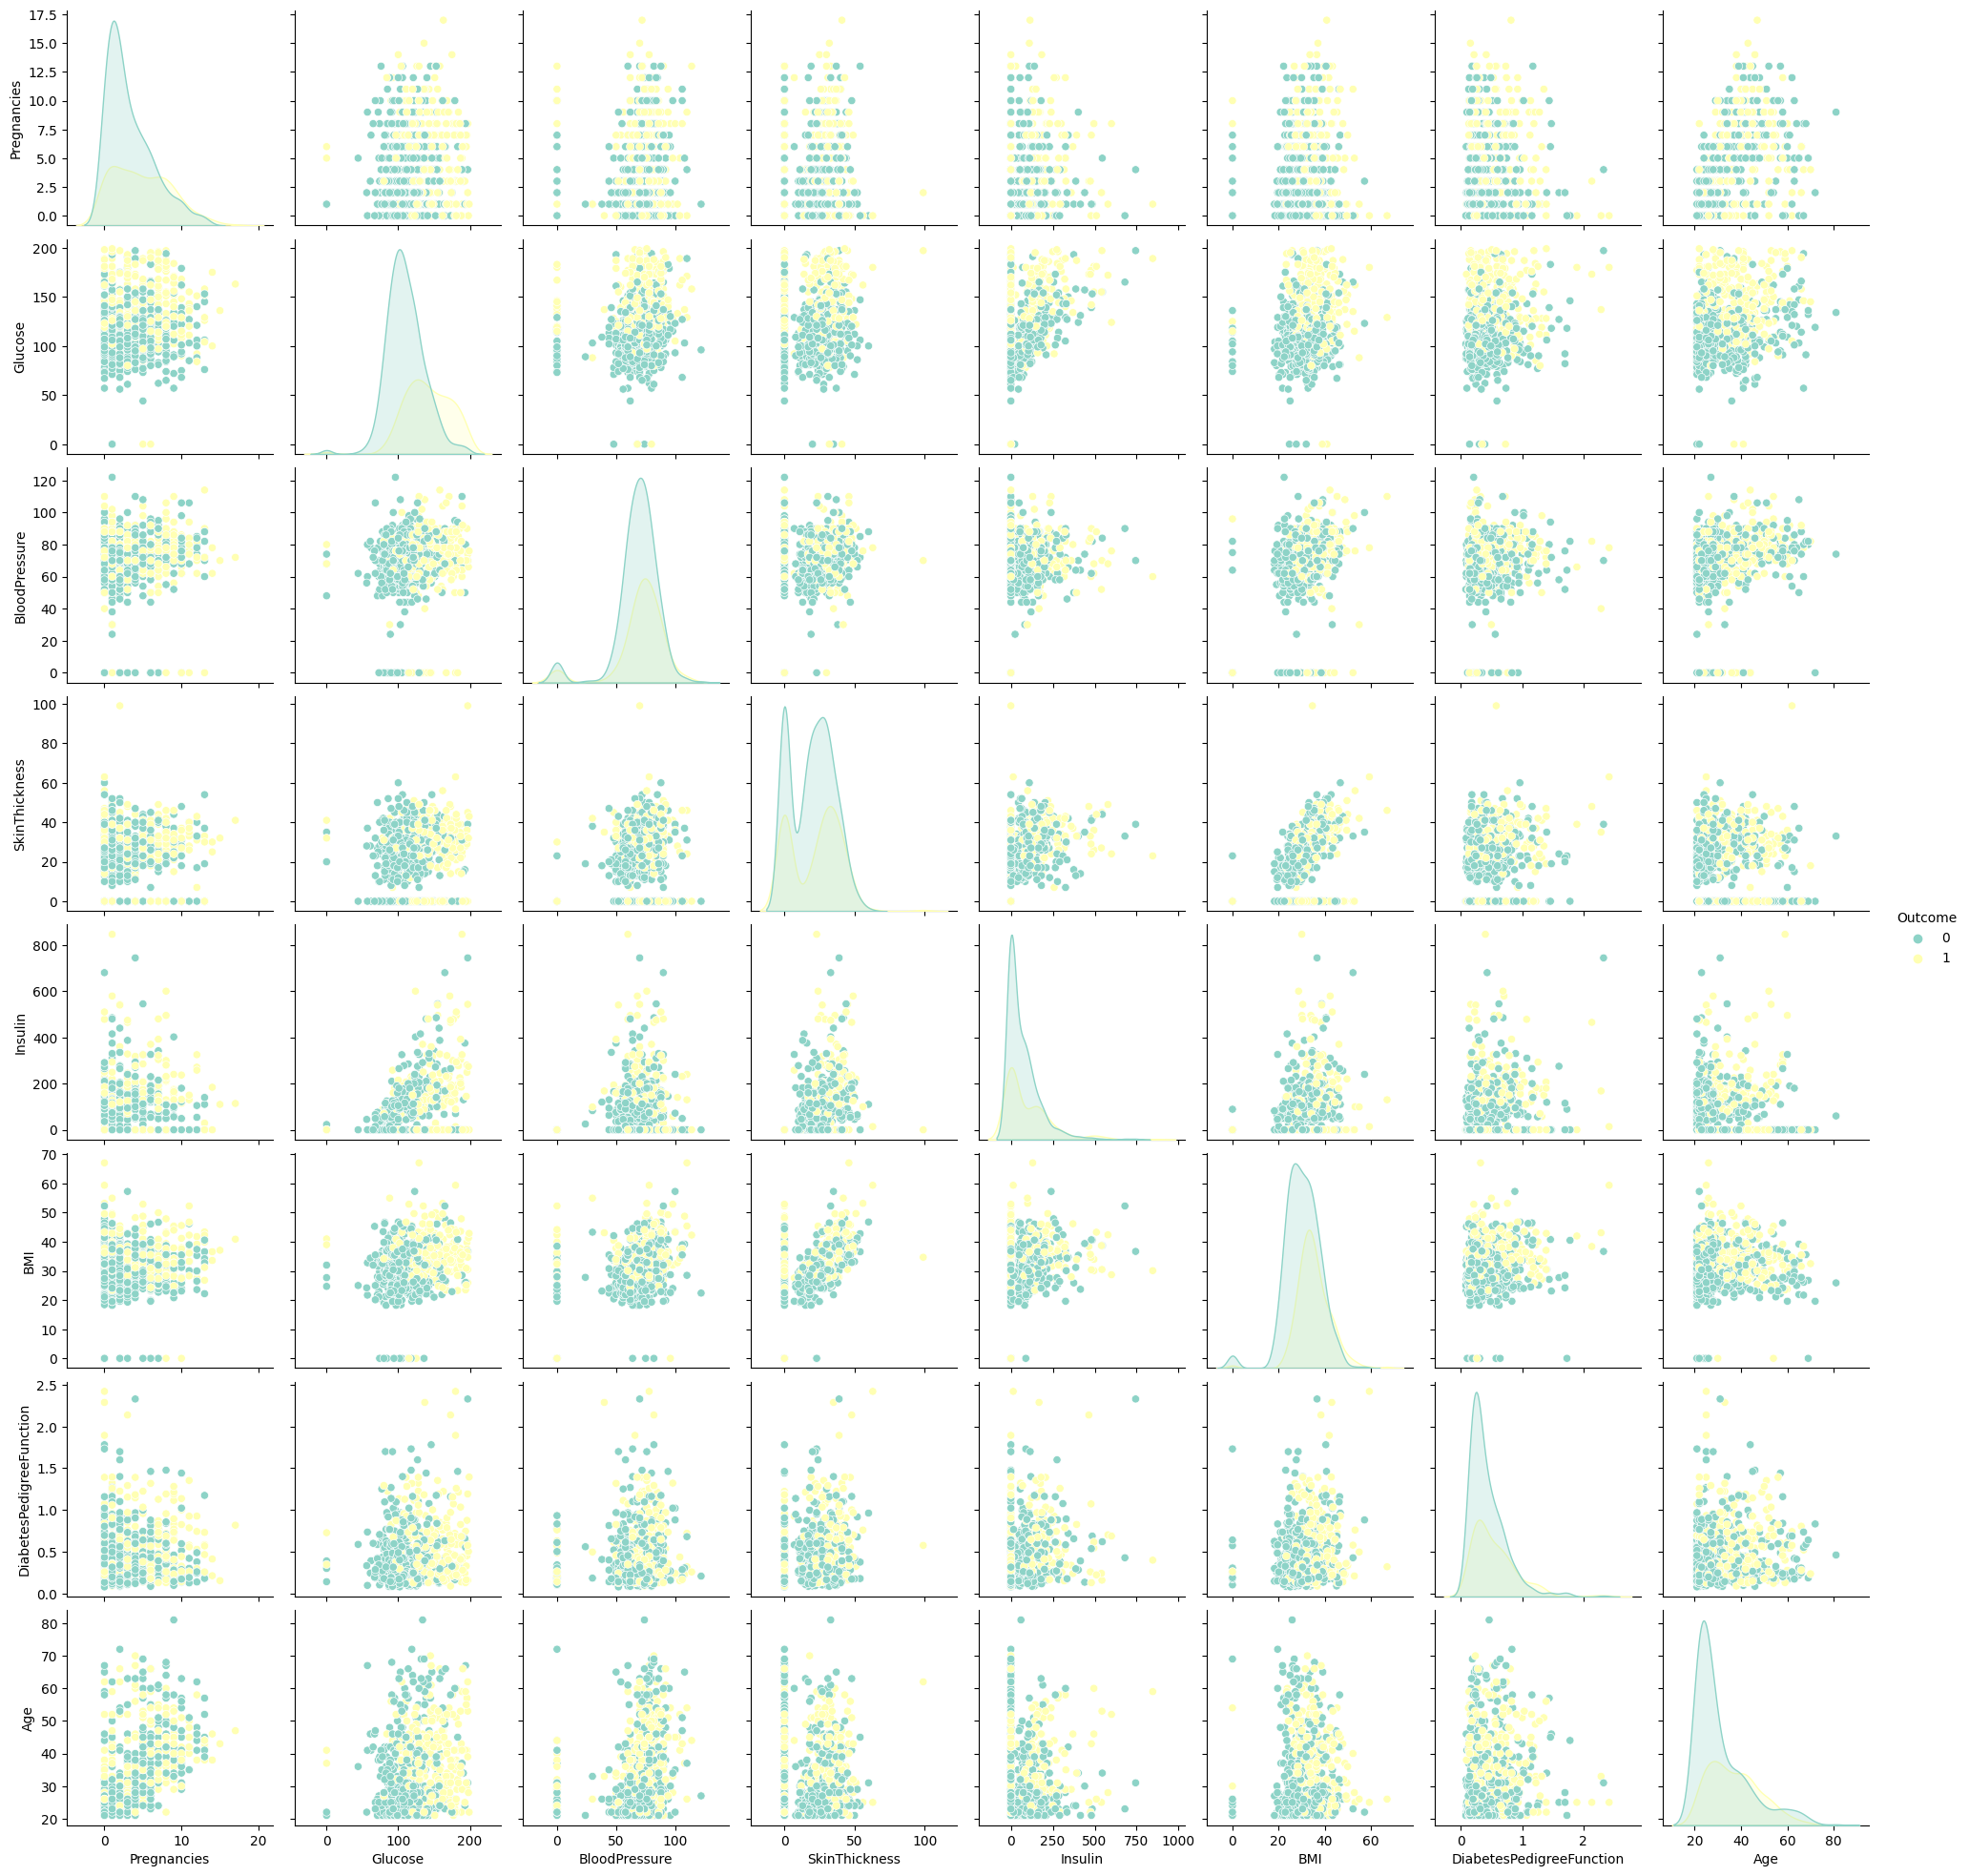

In [87]:
sns.pairplot(df, hue='Outcome', palette='Set3')

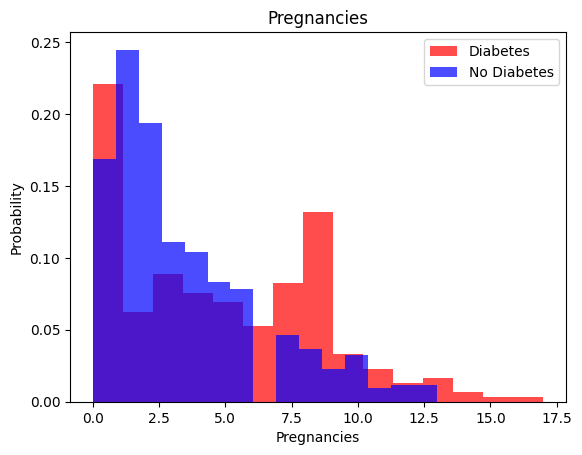

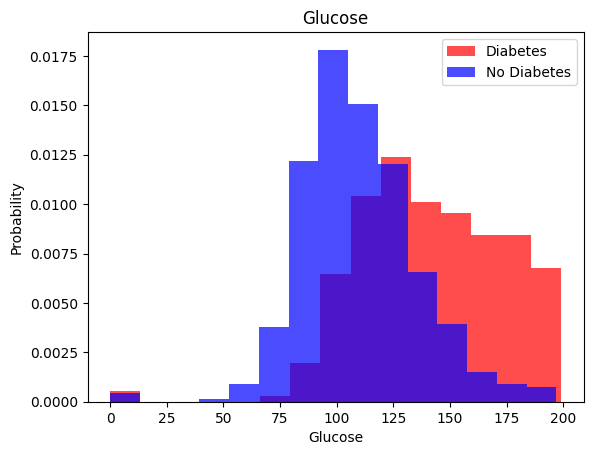

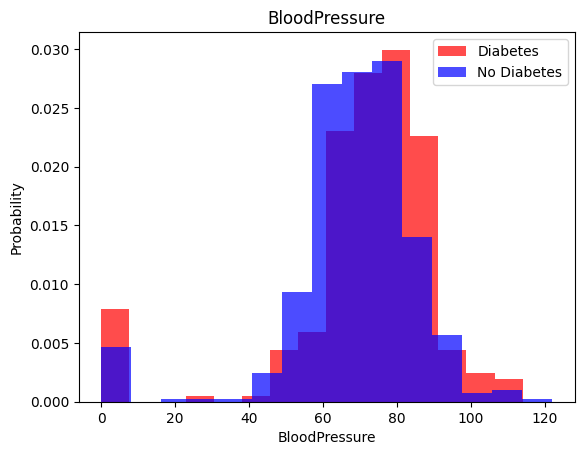

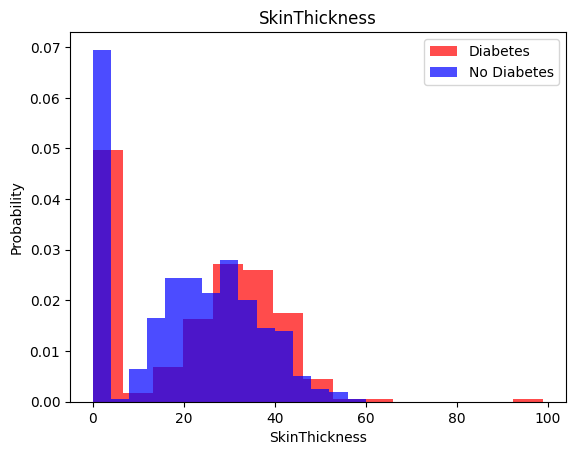

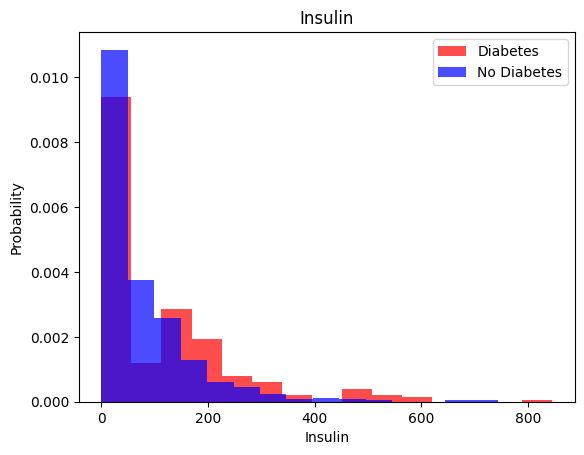

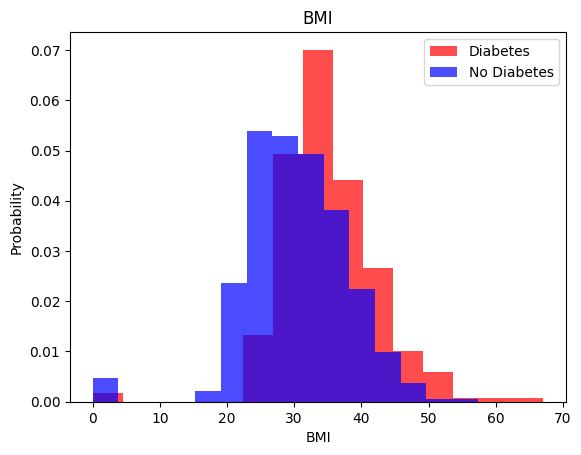

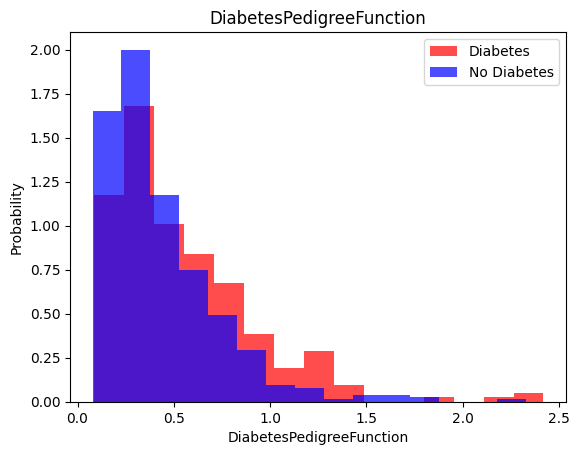

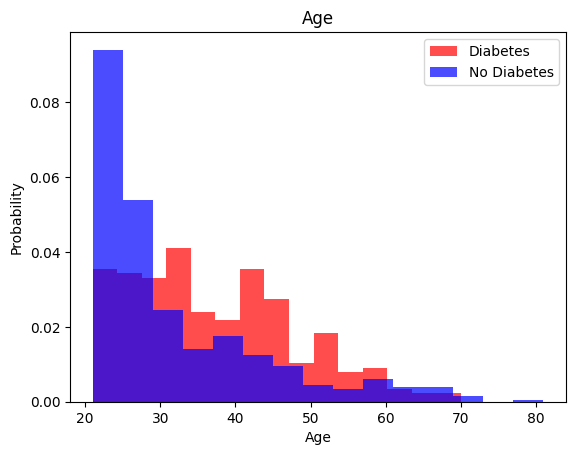

In [88]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(
        df[df['Outcome'] == 1][label],
        color='red',
        label='Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.hist(
        df[df['Outcome'] == 0][label],
        color='blue',
        label='No Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

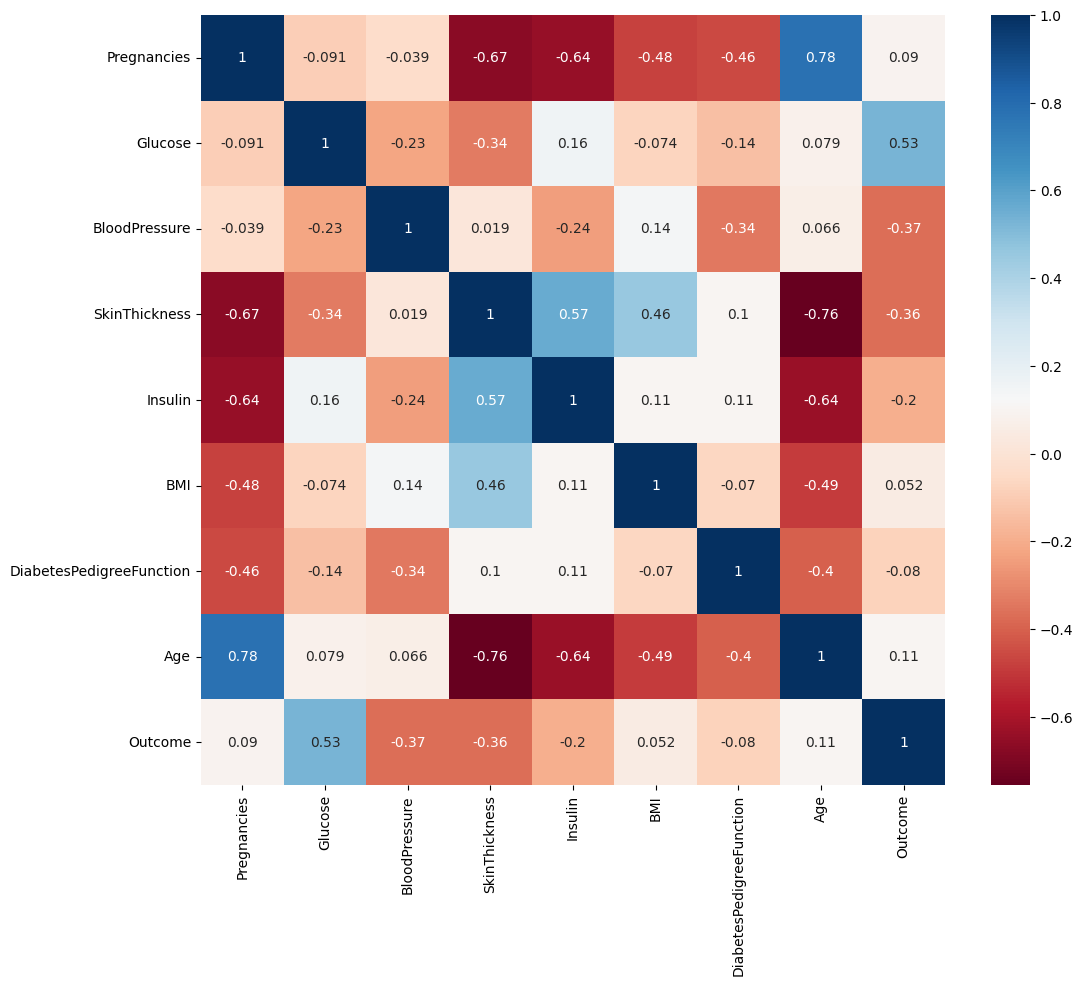

In [89]:
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix.corr(), annot=True,cmap ='RdBu')
plt.show()

In [90]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])
X2 = X.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
import torch.nn as nn
import torch.nn.functional as F

In [94]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_text = torch.FloatTensor(y_test)

In [95]:
df.shape

(768, 9)

In [96]:
class ANN_model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features, hidden1)
        self.f_connected2=nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2, out_features)
    def forward(self, x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [97]:
torch.manual_seed(20)
model = ANN_model()

In [98]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [99]:
# import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# loss_function = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.01)

In [100]:
epochs = 500
final_losses = []
for i in range(epochs):
    i=i+1
    # y_pred = model.forward(X_train)
    # y_train = y_train.type(torch.LongTensor)
    y_pred = model(X_train)
    y_train = y_train.squeeze().type(torch.LongTensor)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch Number: {} and the loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and the loss : 3.484623432159424
Epoch Number: 11 and the loss : 0.7938545346260071
Epoch Number: 21 and the loss : 0.5898013114929199
Epoch Number: 31 and the loss : 0.587310791015625
Epoch Number: 41 and the loss : 0.5660378336906433
Epoch Number: 51 and the loss : 0.5534462928771973
Epoch Number: 61 and the loss : 0.5436716079711914
Epoch Number: 71 and the loss : 0.5346787571907043
Epoch Number: 81 and the loss : 0.526517927646637
Epoch Number: 91 and the loss : 0.5194432735443115
Epoch Number: 101 and the loss : 0.5132220983505249
Epoch Number: 111 and the loss : 0.5072236657142639
Epoch Number: 121 and the loss : 0.5014553070068359
Epoch Number: 131 and the loss : 0.4954076409339905
Epoch Number: 141 and the loss : 0.4889429807662964
Epoch Number: 151 and the loss : 0.4813247323036194
Epoch Number: 161 and the loss : 0.4738500416278839
Epoch Number: 171 and the loss : 0.4673078954219818
Epoch Number: 181 and the loss : 0.4612797498703003
Epoch Number: 191 and the 

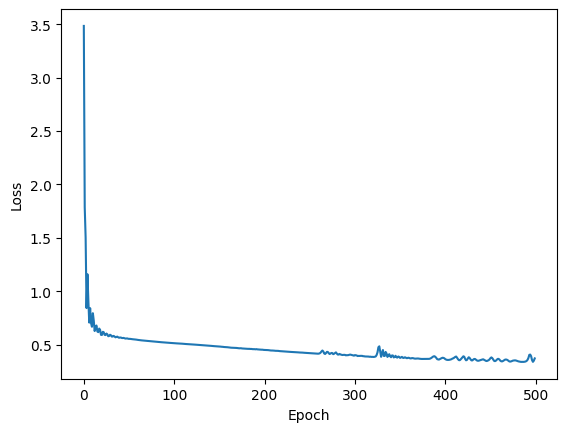

In [101]:
plt.plot(range(epochs), [loss.item() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [102]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0


In [103]:
cm = confusion_matrix(y_test, predictions)
cm

array([[108,  15],
       [ 42,  27]], dtype=int64)

In [105]:
def show_confusion_matrix(ytest, ypred):
    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(ytest, tf.round(ypred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=15)

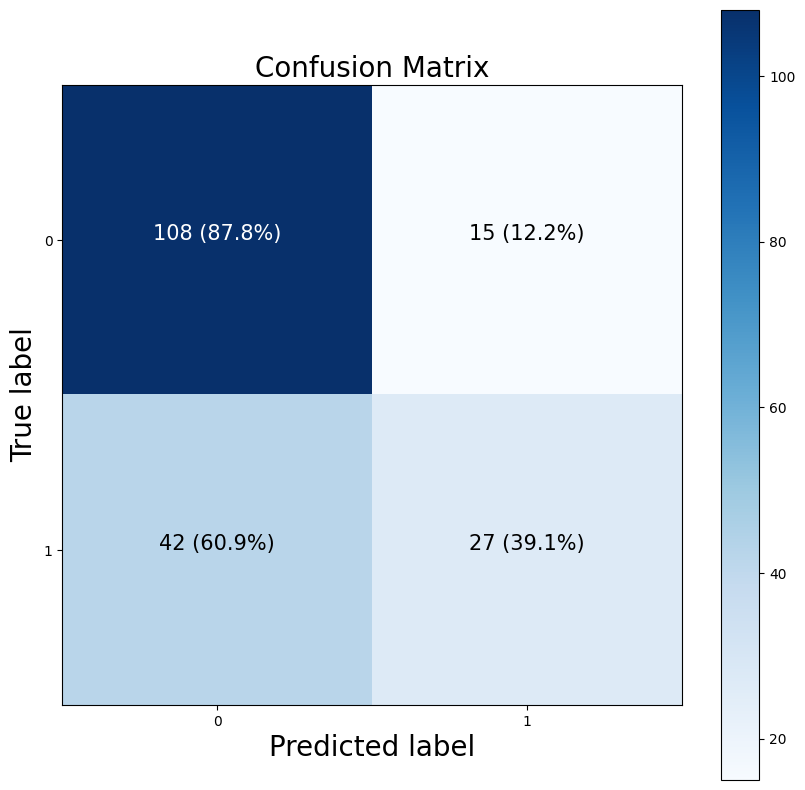

In [106]:
show_confusion_matrix(y_test, predictions)

In [107]:
score = accuracy_score(y_test, predictions)
score

0.703125

In [108]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [109]:
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [110]:
lst1=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [111]:
new_data = torch.tensor(lst1)

In [112]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.1061, 2.4507])
1


In [113]:
new_data

tensor([  6.0000, 148.0000,  72.0000,  35.0000,   0.0000,  33.6000,   0.6270,
         50.0000])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [115]:
tf.random.set_seed(42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid") 
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# Fit the model
class_weight = {0: 1, 1: 0.8}
history = model.fit(X_train, y_train, epochs=100,  validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 4s 49ms/step - loss: 0.5127 - accuracy: 0.7552 - val_loss: 0.5353 - val_accuracy: 0.7552
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 0.4645 - accuracy: 0.7743 - val_loss: 0.5546 - val_accuracy: 0.7031
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4608 - accuracy: 0.7760 - val_loss: 0.5436 - val_accuracy: 0.7188
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4551 - accuracy: 0.7778 - val_loss: 0.5489 - val_accuracy: 0.7292
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 0.4534 - accuracy: 0.7830 - val_loss: 0.5627 - val_accuracy: 0.7135
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4521 - accuracy: 0.7795 - val_loss: 0.5455 - val_accuracy: 0.7396
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4531 - accuracy: 0.7812 - val_loss: 0.5461 - val_accuracy: 0.7188
Epoch 8

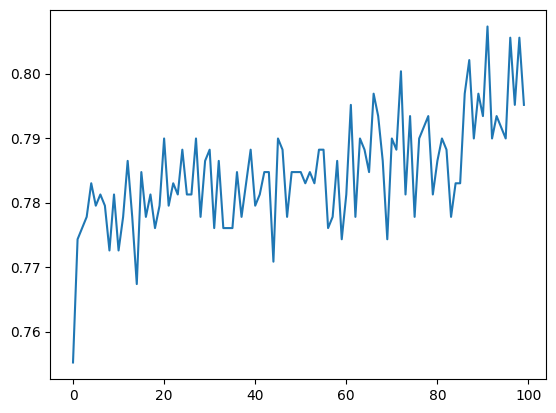

In [116]:
acc = history.history
plt.plot(acc['accuracy'])

In [117]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

6/6 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7448
Model loss on test set: 0.5432361960411072
Model accuracy on test set: 74.48%


6/6 [==============================] - 0s 3ms/step


array([[98, 25],
       [24, 45]], dtype=int64)

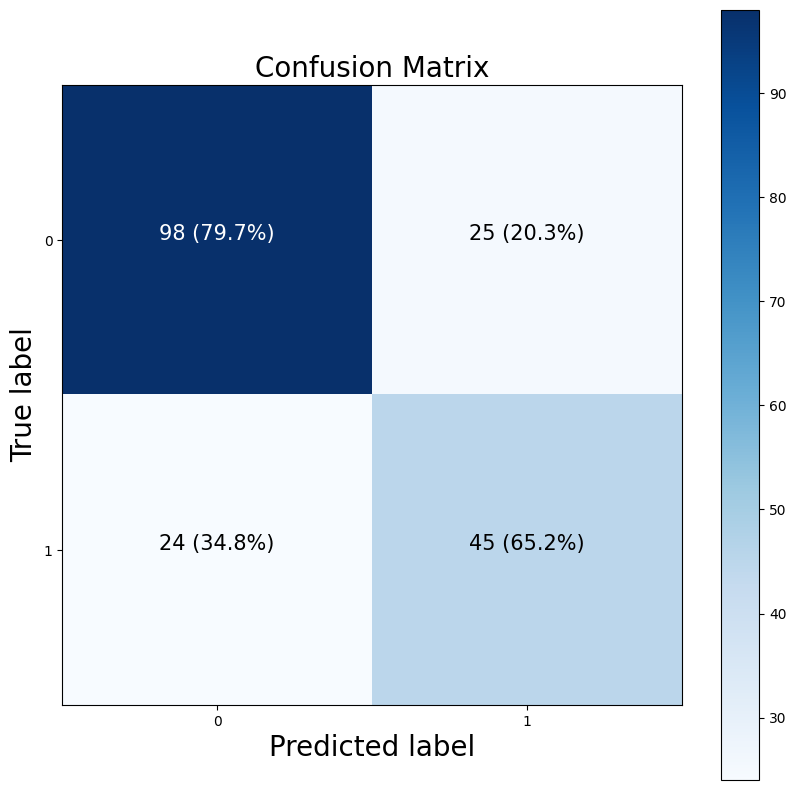

In [119]:
# Make predictions
y_preds = model.predict(X_test)

display(confusion_matrix(y_test, tf.round(y_preds)))
# Create confusion matrix
show_confusion_matrix(y_test, y_preds)

In [120]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 199, number of negative: 377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345486 -> initscore=-0.638940
[LightGBM] [Info] Start training from score -0.638940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [121]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9826
Testing accuracy 0.7083


array([[93, 30],
       [26, 43]], dtype=int64)

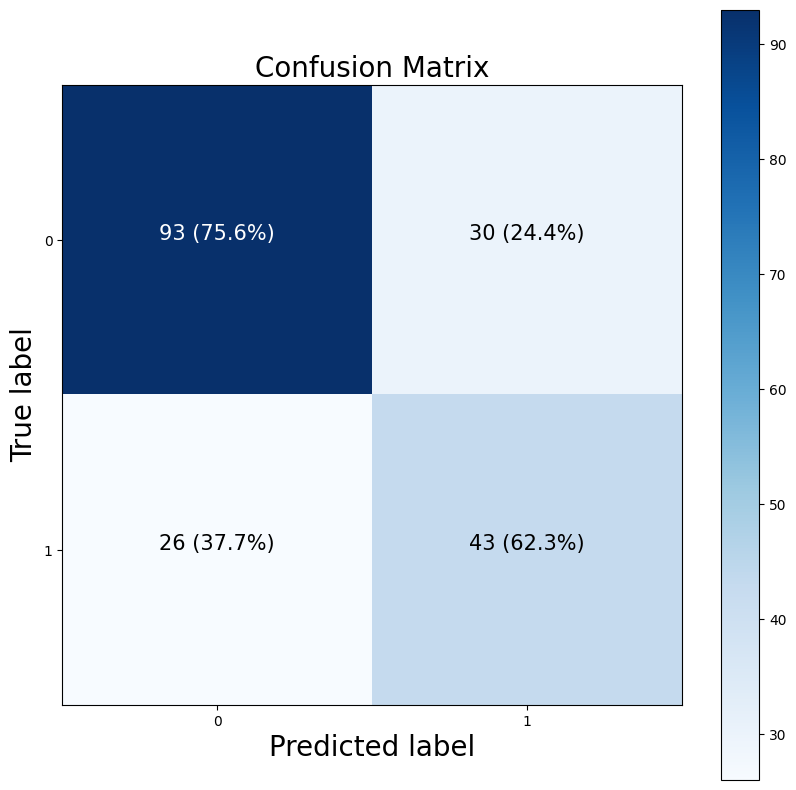

In [122]:
y_preds = model.predict(X_test)

display(confusion_matrix(y_test, tf.round(y_preds)))
# Create confusion matrix
show_confusion_matrix(y_test, y_preds)

In [123]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [124]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

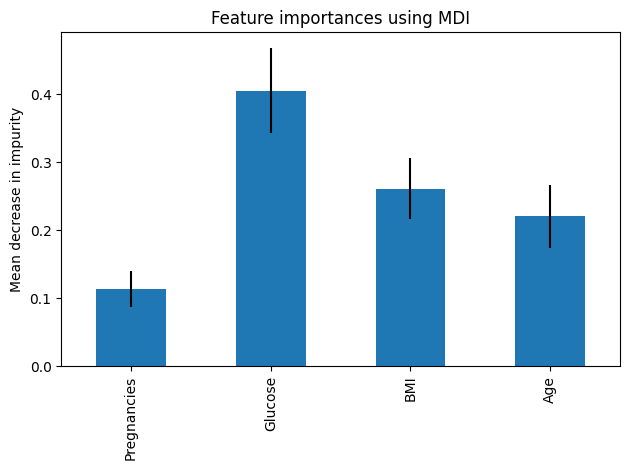

In [126]:
feature_names = X2.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()